# Analyse different properties along the spines of the filaments and orthogonal cuts

In [1]:
import astropy.io.fits as fits
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

### Produce the orthogonal cuts to the spines


In [2]:
def callRadfil(hdu_all, filspine, filmask, distance, cut_separation=None, print_scale_and_sampling=False, 
              shift_to_param_peak=False):

    from radfil import radfil_class as rfc


    alldata = hdu_all[0].data
    allhead = hdu_all[0].header
#     allhead['bunit'] = 'Jy/pixel'
    bmaj = allhead['bmaj'] * u.degree


    arobj = rfc.radfil(alldata, mask=filmask, filspine=filspine, header=allhead, distance=(distance.to(u.pc)).value)

    #
    # extract the spine profiles

    beamscale = (distance * bmaj.to(u.radian).value).to(u.au)
    imagescale = arobj.imgscale.to(u.au)
    sampling = int(np.round((beamscale / imagescale), 0))
    if cut_separation is not None:
        sampling = cut_separation

    
    if print_scale_and_sampling:
        print('    beamscale  = {}'.format(beamscale))
        print('    imagescale = {}'.format(imagescale))
        print('    sampling   = {}'.format(sampling))
    
    arobj.build_profile(samp_int=sampling, shift=shift_to_param_peak)

    return arobj

#### data files

In [7]:
distance = 302 * u.pc
centerCoords = ['03:47:38.992 32:52:50.00', '03:47:40.4 32:51:33.6']

data_dir = 'data_files_prev_works/filaments_anika/'

dataFile = data_dir + 'nh3_11_whole_mom0_8as_3px.fits'
hdu_all = fits.open(dataFile)


No binning is applied.


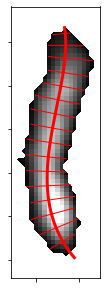

In [8]:
### Filament 1 ###

fil1File = data_dir + 'B5_nh3_fil1.fits'
fil1MaskFile = data_dir + 'B5_mask_fil1.fits'
fil1SpineFile = data_dir + 'B5_spine_fil1.fits'

fil1mask = fits.getdata(fil1MaskFile).astype(bool)
fil1spine = fits.getdata(fil1SpineFile).astype(bool)

cuts_fil1 = callRadfil(hdu_all, fil1spine, fil1mask, distance, cut_separation=4)
dict_fil1 = cuts_fil1.dictionary_cuts

No binning is applied.


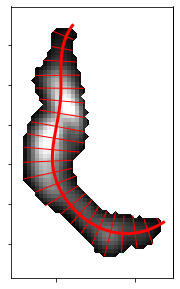

In [9]:
# Filament 2 ###

fil2File = data_dir + 'B5_nh3_fil2.fits'
fil2MaskFile = data_dir + 'B5_mask_fil2.fits'
fil2SpineFile = data_dir + 'B5_spine_fil2.fits'

fil2mask = fits.getdata(fil2MaskFile).astype(bool)
fil2spine = fits.getdata(fil2SpineFile).astype(bool)

cuts_fil2 = callRadfil(hdu_all, fil2spine, fil2mask, distance, cut_separation=4)
dict_fil2 = cuts_fil2.dictionary_cuts

##### centre of the cuts, position of highest mom0 value along the cut

In [10]:
cent_spn_fil1 = dict_fil1['plot_peaks']
cent_spn_fil2 = dict_fil2['plot_peaks']

cent_spn_both = [cent_spn_fil1, cent_spn_fil2]

##### co-ordinates of the end-points of the cuts

In [11]:
coords_endpt_cuts_fil1 = np.asarray(dict_fil1['plot_cuts'])
coords_endpt_cuts_fil2 = np.asarray(dict_fil2['plot_cuts'])

x1_spn_fil1 = coords_endpt_cuts_fil1[:,0,0]
y1_spn_fil1 = coords_endpt_cuts_fil1[:,0,1]
x2_spn_fil1 = coords_endpt_cuts_fil1[:,1,0]
y2_spn_fil1 = coords_endpt_cuts_fil1[:,1,1]

x1_spn_fil2 = coords_endpt_cuts_fil2[:,0,0]
y1_spn_fil2 = coords_endpt_cuts_fil2[:,0,1]
x2_spn_fil2 = coords_endpt_cuts_fil2[:,1,0]
y2_spn_fil2 = coords_endpt_cuts_fil2[:,1,1]


x1_spn_both = [x1_spn_fil1, x1_spn_fil2]
x2_spn_both = [x2_spn_fil1, x2_spn_fil2]
y1_spn_both = [y1_spn_fil1, y1_spn_fil2]
y2_spn_both = [y2_spn_fil1, y2_spn_fil2]


### Show spines and orthogonal cuts

In [14]:
from os import listdir

fls = listdir('data_files_prev_works/masks_anika')
fls = [i for i in fls if 'rgrd.fits' in i]

msk_regs = {ms[:-10] : fits.getdata('data_files_prev_works/masks_anika/'+ms) for ms in fls}

In [15]:
from aplpy import FITSFigure
from astropy.io.fits import PrimaryHDU
import astropy.units as u

import matplotlib as mpl
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

In [16]:
def aplpy_plot(fig= None, data=None, hd=None, cmap='inferno', vmin=9.7, vmax=10.7, colourbar=True, bm_clr='k',
               colourbar_text=r'$\rm{v_{LSR}}\ (km\,s^{-1})$', beam_colour='green', fgsz=(7,7), zoom=False, 
               colourbar_loc='right', scalebar_corner='top right', sbplt=[0, 0, 1, 1], contours=False, 
               contour_clr='k', background_grey=False, bckgr_gr_clr='0.8', x_bm_lbl=0.07, y_bm_lbl=0.07, 
               colourscale_stretch='linear', vmid=None) :
    """ 
    return aplpy FITSfigure for given data
    """
#     if not fig:
#         fig = plt.figure(figsize=fgsz)
        
#     fig = FITSFigure( data=PrimaryHDU(data=data, header=hd), figure=fig, subplot=sbplt)
    
    if background_grey:
        cmap = plt.get_cmap(cmap)
        cmap.set_bad(bckgr_gr_clr)
    
    fig.show_colorscale( cmap=cmap, vmin=vmin, vmax=vmax,stretch=colourscale_stretch, vmid=vmid)
    
    if colourbar:
        fig.add_colorbar()
        fig.colorbar.show(location=colourbar_loc, axis_label_text=colourbar_text)
    
    fig.add_beam(color=beam_colour)
    
    distance = 302 *u.pc
    scale=(0.1*u.pc/distance*u.rad).to(u.deg)
#     fig.add_scalebar(scale, label='0.1 pc', corner=scalebar_corner)
#     fig.set_nan_color('0.7')
    fig.ticks.set_color('black')
    fig.add_label( x_bm_lbl, y_bm_lbl, 'B5', relative=True, color= bm_clr, size=15)
    
#     if contours :
#         fig.show_contour(msk_regs['fil1'], colors=[contour_clr], levels=[0])
#         fig.show_contour(msk_regs['fil2'], colors=[contour_clr], levels=[0])

#         fig.show_contour(msk_regs['cnd1'], colors=[contour_clr], levels=[0], linestyles='dashed')
#         fig.show_contour(msk_regs['cnd2'], colors=[contour_clr], levels=[0], linestyles='dashed')
#         fig.show_contour(msk_regs['cnd3'], colors=[contour_clr], levels=[0], linestyles='dashed')
    
    return fig

In [18]:
from astropy.wcs import WCS

hd2d = fits.getheader(dataFile)
wcs = WCS(hd2d).celestial

# ra_nr_blue, dec_nr_blue = wcs.wcs_pix2world(x_nr_red, y_nr_red, 0)

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/astropy/visualization/wcsaxes/core.py:235: UserWarning: No contour levels were found within the data range.
  cset = super().contour(*args, **kwargs)
/Users/spandan/opt/anaconda3/envs/analysis/lib/python3.10/site-packages/astropy/visualization/wcsaxes/core.py:235: UserWarning: No contour levels were found within the data range.
  cset = super().contour(*args, **kwargs)


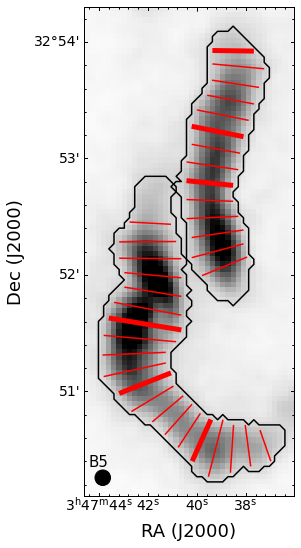

In [19]:
fig_mom0 = FITSFigure(dataFile)

fig = aplpy_plot(fig=fig_mom0, cmap='Greys', zoom=True, fgsz=(6,10), vmin=10, vmax=300, colourbar=False, 
                 background_grey=False, beam_colour='k', contours=True)

fig.show_contour(msk_regs['fil1'], colors=['k'], levels=[0])
fig.show_contour(msk_regs['fil2'], colors=['k'], levels=[0])

fig.recenter(56.918, 32.87, width=0.03, height=0.07)

for i in range(1,15):
    ra1, dec1 = wcs.wcs_pix2world(x1_spn_fil1[i], y1_spn_fil1[i], 0)
    ra2, dec2 = wcs.wcs_pix2world(x2_spn_fil1[i], y2_spn_fil1[i], 0)

    iline = np.array([[ra1, ra2],[dec1,dec2]])
    if i in [6,9,14] :
        fig.show_lines([iline], color = 'r', linewidth=5)
    else:
        fig.show_lines([iline], color = 'r')
    
for i in range(1,21):
    ra1, dec1 = wcs.wcs_pix2world(x1_spn_fil2[i], y1_spn_fil2[i], 0)
    ra2, dec2 = wcs.wcs_pix2world(x2_spn_fil2[i], y2_spn_fil2[i], 0)

    iline = np.array([[ra1, ra2],[dec1,dec2]])
    if i in [5,10,14] :
        fig.show_lines([iline], color = 'r', linewidth=5)
    else:
        fig.show_lines([iline], color = 'r')
    
    

fig.savefig('plots/spines-cuts.pdf', dpi=200)

#### x- and y-coordinates of the cuts from the end points

In [20]:
def xy_cuts(x1=None, y1=None, x2=None, y2=None, extra_pix=3):
    m = (y1 - y2) / (x1 - x2)
    
    x_arr = 0
    y_arr = 0
    if abs(m) <= 1 :
        x_arr = np.arange(x1-extra_pix, x2+extra_pix,1)
        y_arr = y1 + m* (x_arr - x1)
    elif abs(m)>1 :
        y_arr = np.arange(y1-extra_pix, y2+extra_pix,1)
        x_arr = x1 + (y_arr - y1)/m
        
    xarr_rnd = np.round(x_arr)
    yarr_rnd = np.round(y_arr)

    x_int = xarr_rnd.astype(int)
    y_int = yarr_rnd.astype(int)
        
    return x_int, y_int

##### store the x- and y-coordinates of cuts

In [21]:
dict_coords_cut_spn_fil1 = {}

for i in range(len(x1_spn_fil1)):
    x_ls, y_ls = xy_cuts(x1 = x1_spn_fil1[i], y1 = y1_spn_fil1[i], x2 = x2_spn_fil1[i], y2 = y2_spn_fil1[i], 
                         extra_pix=3)
    
    dict_coords_cut_spn_fil1['cut_'+str(i+1)] = [x_ls, y_ls]

In [22]:
dict_coords_cut_spn_fil2 = {}

for i in range(len(x1_spn_fil2)):
    xarr, yarr = xy_cuts(x1 = x1_spn_fil2[i], y1 = y1_spn_fil2[i], x2 = x2_spn_fil2[i], y2 = y2_spn_fil2[i], 
                         extra_pix=1)
    dict_coords_cut_spn_fil2['cut_'+str(i+1)] = [xarr, yarr]

In [23]:
def dict_coords_spine(fila=None, extra_pix=None):
    dict_coords = {}
    
    x1_spn = x1_spn_both[fila-1]
    y1_spn = y1_spn_both[fila-1]
    x2_spn = x2_spn_both[fila-1]
    y2_spn = y2_spn_both[fila-1]
    
    for i in range(len(x1_spn)):
        xarr, yarr = xy_cuts(x1 = x1_spn[i], y1 = y1_spn[i], x2 = x2_spn[i], y2 = y2_spn[i], extra_pix=extra_pix)
        dict_coords['cut_'+str(i+1)] = [xarr, yarr]
        
    return dict_coords

###### calculate distance from centre

In [24]:
def calc_dist(x_cent=None, y_cent=None, x_pos=None, y_pos=None, with_sign=False):
    del_x = x_cent - x_pos
    del_y = y_cent - y_pos
    
    dist = np.sqrt(del_x**2 + del_y**2)
    
    sign=1
    
    if with_sign:
        
        xmin = np.min(x_pos)
        xmax = np.max(x_pos)
        ymin = np.min(y_pos)
        ymax = np.max(y_pos)
          
        xdiff = xmax - xmin
        ydiff = ymax - ymin
        
        if xdiff > ydiff :
            sign = del_x/abs(del_x)
        elif ydiff > xdiff :
            sign = del_y/abs(del_y)
            
    return dist*sign

In [25]:
def dict_dist_frm_cent(fila=None, dict_coords_cut=None, centre_spine=None):
    
    dict_dist = {}
    
    for i in range(len(dict_coords_cut)):
        dict_dist['cut_'+str(i+1)] = calc_dist(x_cent=centre_spine[i][0], y_cent=centre_spine[i][1], 
                                               x_pos=dict_coords_cut['cut_'+str(i+1)][0], 
                                               y_pos=dict_coords_cut['cut_'+str(i+1)][1], with_sign=True)
        
    return dict_dist

### extended velocity

In [79]:
vel_ext = fits.getdata('sorted_comps/vel_extended.fits')

### wrapper to plot parameter across filament cuts

In [27]:
def plot_ortho_cut(param=None, extra_pix=None, fila=1, new_ax=True, c='b', ax=None, ret_cuts=False, 
                   print_cut_num=False, marker_size=30, 
                   plot_cut_bound=False, colour_cut_bound='k', plot_cut_cent=False, colour_cut_cent='r', 
                   print_cv=False, x_axis_phys=False, plot_sel_cuts=False, sel_cuts=None, print_delv=False):
    
    centre_spine = cent_spn_both[fila-1]
    dict_coords = dict_coords_spine(fila=fila, extra_pix=extra_pix)
    dict_dist = dict_dist_frm_cent(fila=fila, dict_coords_cut=dict_coords, centre_spine=centre_spine)
    
    if ret_cuts:
        return dict_coords
    
    if new_ax:
        if fila == 1:
            fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(16,9))
        elif fila == 2:
            fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(16,12))
            
    ax_flat = ax.flat
    
    if plot_sel_cuts:
        plot_range = sel_cuts
    else : 
        plot_range = range(len(centre_spine))
    
    k = 0
    
    for i in plot_range:
        
        axs = ax_flat[k]
        
        xi, yi = dict_coords['cut_'+str(i+1)]
        dist_i = dict_dist['cut_'+str(i+1)]
        
        if x_axis_phys :
            dist_i = dist_i * pix_len

        param_list = [param[yi[j], xi[j]] for j in range(len(xi))]

        #axs.plot(dist_i, param_list, c+'.')
        axs.scatter(dist_i, param_list, color=c, s=marker_size)#+'.')
        
        if print_cut_num:
            axs.text(0.1,0.9, 'cut = ' + str(i+1), horizontalalignment='left', transform=axs.transAxes)
        
#         print(plot_cut_bound)
        
        if plot_cut_bound :
            end_x1, end_y1 = x1_spn_both[fila-1][i], y1_spn_both[fila-1][i]
            end_x2, end_y2 = x2_spn_both[fila-1][i], y2_spn_both[fila-1][i]
            
            dist1 = calc_dist(x_cent=centre_spine[i][0], y_cent=centre_spine[i][1], x_pos=end_x1, y_pos=end_y1, 
                              with_sign=True)
            dist2 = calc_dist(x_cent=centre_spine[i][0], y_cent=centre_spine[i][1], x_pos=end_x2, y_pos=end_y2, 
                              with_sign=True)
            
            if x_axis_phys:
                dist1 = dist1 * pix_len
                dist2 = dist2 * pix_len
                
            axs.axvline(x=dist1*-1, ls=':', c=colour_cut_bound)
            axs.axvline(x=dist2, ls=':', c=colour_cut_bound)
            
        if plot_cut_cent :
            axs.axvline(x=0, ls=':', c=colour_cut_cent)
            
            
        if print_cv :
            vel1 = param[int(np.round(end_y1)), int(np.round(end_x1))]
            vel2 = param[int(np.round(end_y2)), int(np.round(end_x2))]

            del_v = np.abs(vel1 - vel2)

            cv = calc_cv_chen(del_v=del_v, ML=ML_both[fila-1][i])
            
            axs.text(0.05, 0.9, r'$C_v = $' + str(np.round(cv, 4)), 
                     horizontalalignment='left', transform=axs.transAxes)

        if print_delv :
            vel1 = param[int(np.round(end_y1)), int(np.round(end_x1))]
            vel2 = param[int(np.round(end_y2)), int(np.round(end_x2))]

            del_v = np.abs(vel1 - vel2)/2

            delv_cv_1 = del_v_for_cv_1(ML_both[fila-1][i])
            
            axs.text(0.45, 0.9, r'$\Delta v = $' + str(np.round(del_v, 2)) + r'$km\,s^{-1}$', 
                     horizontalalignment='right', transform=axs.transAxes)
            axs.text(0.45, 0.85, r'$\Delta v_{C_v = 1} = $' + str(np.round(delv_cv_1, 2)) + r'$km\,s^{-1}$', 
                     horizontalalignment='right', transform=axs.transAxes)

            
        k += 1

### Column density from intensity of $\rm NH_3$ (1,1)

In [28]:
mom0_11 = fits.getdata(data_dir + 'nh3_11_whole_8as_3px_mom0_w-model.fits')

### convert to mass in the filaments (as Schmiedeke et al., 2021, page 6)

In [29]:
mom0_11_fil1 = mom0_11 * fil1mask
mom0_11_fil2 = mom0_11 * fil2mask

mom0_11_fil1[mom0_11_fil1 == 0] = np.nan
mom0_11_fil2[mom0_11_fil2 == 0] = np.nan

In [30]:
# subtract background

mom0_bgsub_fil1 = mom0_11_fil1 - np.nanmin(mom0_11_fil1)
mom0_bgsub_fil2 = mom0_11_fil2 - np.nanmin(mom0_11_fil2)

In [31]:
# Convert K km/s to Jy/beam km/s

from radio_beam import Beam

In [33]:
my_beam = Beam.from_fits_header(hd2d)

# restfrq = hd_tmb['restfrq'] * u.Hz

restfrq = 23694495500 * u.Hz

jybm2K = (1*u.Jy).to(u.K, u.brightness_temperature(restfrq, my_beam)).value

K2jybm = 1./jybm2K

In [36]:
# convert beam to pixel

# beam area

bmaj = hd2d['bmaj']*u.deg
bmin = hd2d['bmin']*u.deg

beamArea = np.pi / (4.0 * np.log(2)) * bmaj.to(u.arcsec) * bmin.to(u.arcsec)

# pixel area

xPixSize = abs(hd2d['cdelt1']) * u.degree
xPixSize = xPixSize.to(u.arcsec)
pixelArea = (xPixSize ** 2)

pixel2beam = pixelArea.value / beamArea.value
beam2pixel = 1 / pixel2beam

#
# Kelvin conversion factors


equiv = u.brightness_temperature(restfrq)

jybeam2kelvin = ((1* u.Jy/beamArea).to(u.K, equivalencies=equiv)).value
kelvin2jybeam = 1 / jybeam2kelvin

In [37]:
mom0_11_jy = mom0_11 * K2jybm * pixel2beam

In [38]:
# Intensity to mass

mass_fil1 = mom0_bgsub_fil1 * K2jybm * pixel2beam * 1.5
mass_fil2 = mom0_bgsub_fil2 * K2jybm * pixel2beam * 1.5

In [39]:
# Pixel length

pix_len = (xPixSize.to(u.radian) * 302).value

#### M/L in each cut

In [40]:
MpL_fil1 = []

for i in range(len(x1_spn_fil1)):
    
    xarr, yarr = xy_cuts(x1 = x1_spn_fil1[i], y1 = y1_spn_fil1[i], x2 = x2_spn_fil1[i], y2 = y2_spn_fil1[i], 
                         extra_pix=1)
    
    mom0_cut = mom0_11_jy[yarr, xarr]
    mom0_cut_bgsub = mom0_cut - 0.0028
    ms = np.nansum(mom0_cut_bgsub * 1.5)
    
    MpL_fil1.append((ms/pix_len))

In [41]:
MpL_fil2 = []

for i in range(len(x1_spn_fil2)):
    
    xarr, yarr = xy_cuts(x1 = x1_spn_fil2[i], y1 = y1_spn_fil2[i], x2 = x2_spn_fil2[i], y2 = y2_spn_fil2[i], 
                         extra_pix=0)
    
    mom0_cut = mom0_11_jy[yarr, xarr]
    mom0_cut_bgsub = mom0_cut - 0.00266
    ms = np.nansum(mom0_cut_bgsub * 1.5)

    MpL_fil2.append((ms/pix_len))

In [42]:
ML_both = [MpL_fil1, MpL_fil2]

### Calculate $\rm{C_v}$

In [43]:
import scipy.constants as c

def calc_cv_chen(del_v=None, ML=None, ret_err=False, edel_v=None):
    
    numer = (del_v*1000/2.0)**2
    denom = (c.G) * ML * (2e30) * (c.parsec)**-1
    
    val = numer/denom

    if ret_err:
    
        ecv = ( np.sqrt(4 * (edel_v/del_v)**2 + (0.7/1.5)**2 ))  *val
        return ecv
    else :
        return val

#### calculate $\rm{\Delta v_h}$ required to have $\rm{C_v} = 1$

In [46]:
def del_v_for_cv_1(ML=None):
    
    denom = (c.G) * ML * (2e30) * (c.parsec)**-1
    
    delv = np.sqrt(denom)
    
    delv_kms = delv/1000
    
    return delv_kms

### Plot velocity gradient in orthogonal cuts

/var/folders/sk/jfjx4bmj537bjltqh3y2ldph0000gn/T/ipykernel_91483/3435525933.py:20: RuntimeWarning: invalid value encountered in divide
  sign = del_x/abs(del_x)


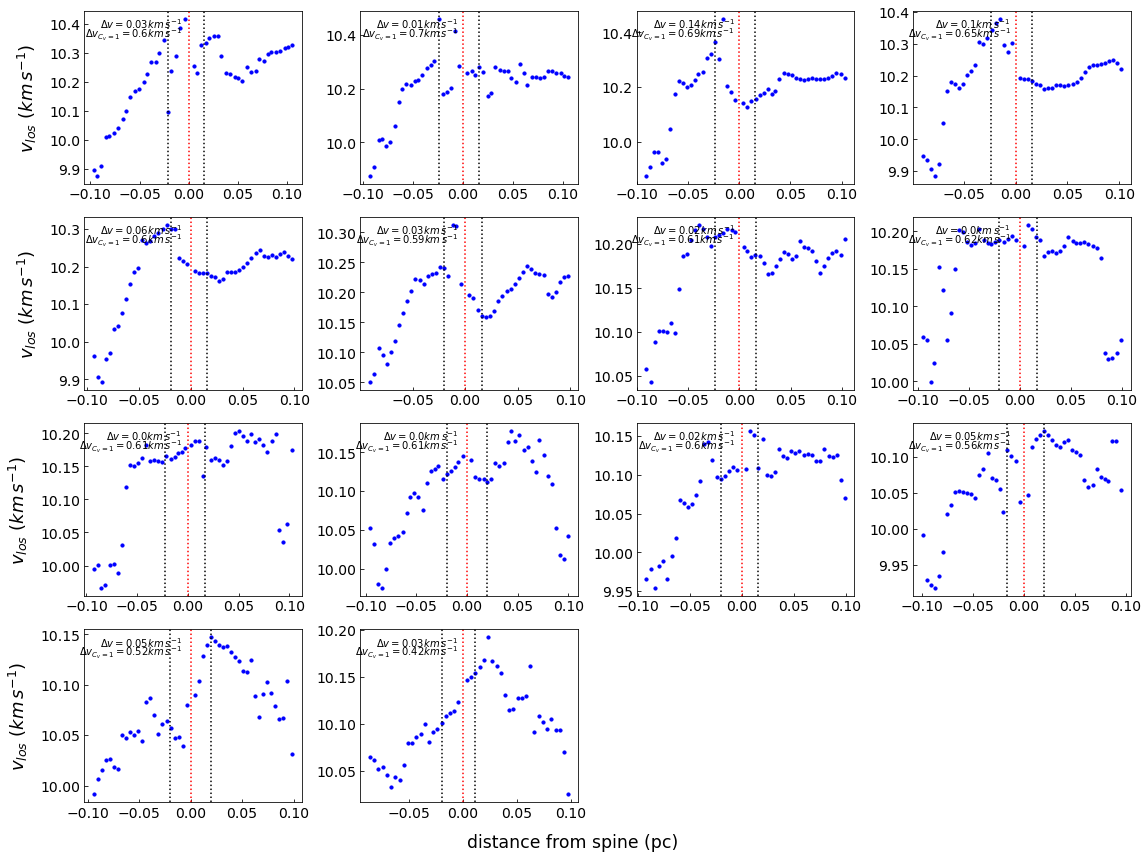

In [52]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(16,12))

plot_ortho_cut(param=vel_ext, extra_pix=20, fila=1, ax=ax, new_ax=False, marker_size=10, plot_cut_bound=True, 
               plot_cut_cent=True, print_delv=True, x_axis_phys=True, plot_sel_cuts=True, sel_cuts=range(1,15))

for i in range (4):
    ax[i,0].set_ylabel(r'$v_{los}\ (km\,s^{-1})$', labelpad=10)

fig.supxlabel('distance from spine (pc)', size='xx-large')

ax[3,2].set_visible(False)
ax[3,3].set_visible(False)
    
plt.tight_layout()


fig.savefig('plots/vel_grad_w_cv_fila_1_all.pdf')

/var/folders/sk/jfjx4bmj537bjltqh3y2ldph0000gn/T/ipykernel_91483/3435525933.py:22: RuntimeWarning: invalid value encountered in divide
  sign = del_y/abs(del_y)
/var/folders/sk/jfjx4bmj537bjltqh3y2ldph0000gn/T/ipykernel_91483/3435525933.py:20: RuntimeWarning: invalid value encountered in divide
  sign = del_x/abs(del_x)


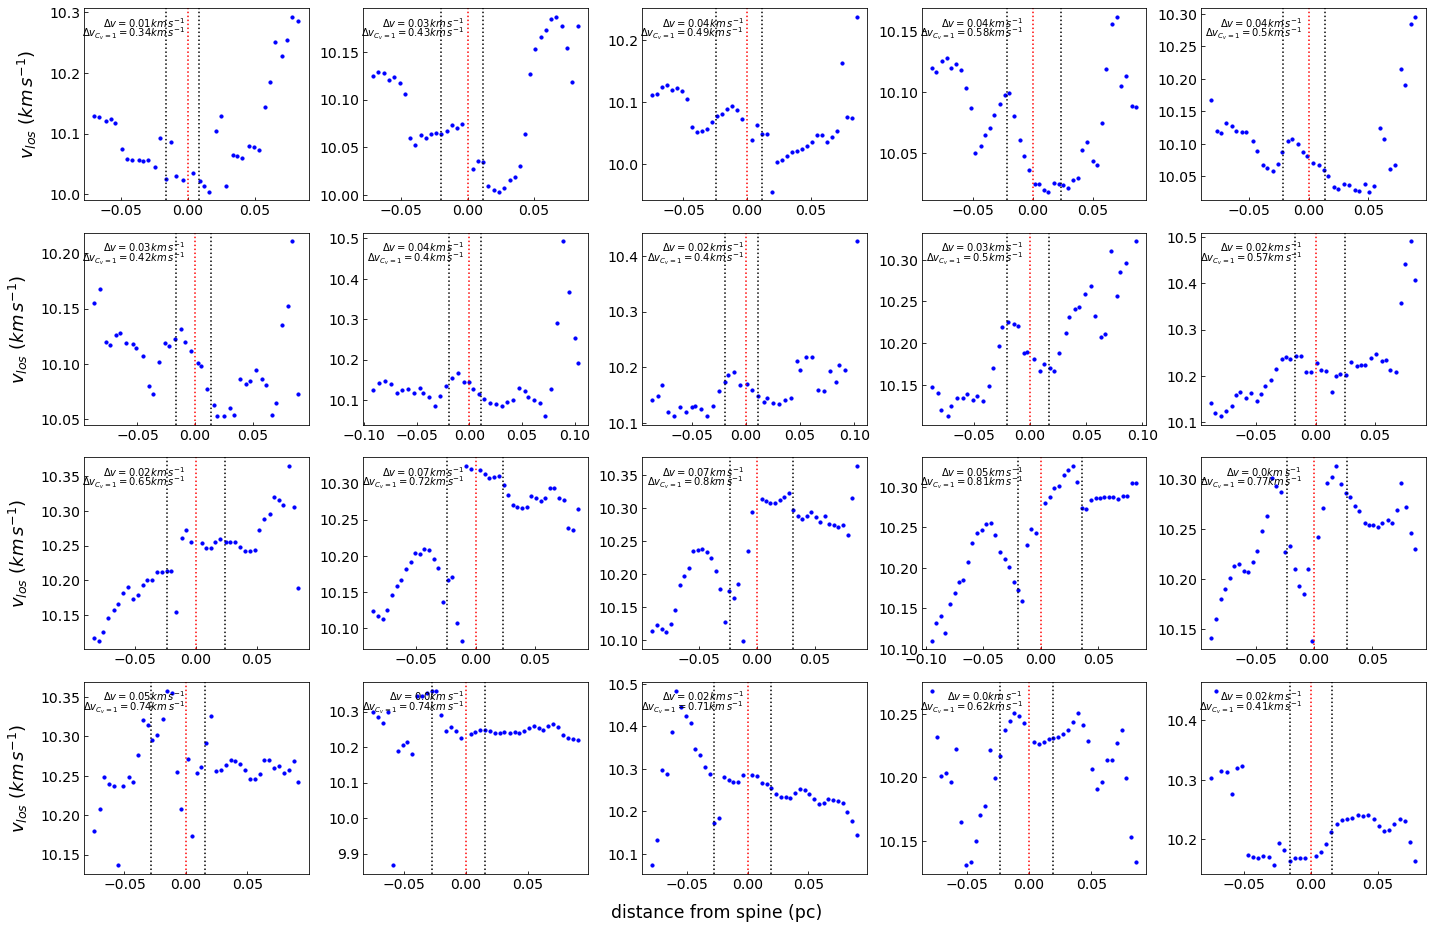

In [53]:
fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(20,13))

plot_ortho_cut(param=vel_ext, extra_pix=16, fila=2, ax=ax, new_ax=False, marker_size=10, plot_cut_bound=True, 
               plot_cut_cent=True, print_delv=True, x_axis_phys=True, plot_sel_cuts=True, sel_cuts=range(1,21))

for i in range (4):
    ax[i,0].set_ylabel(r'$v_{los}\ (km\,s^{-1})$', labelpad=10)

fig.supxlabel('distance from spine (pc)', size='xx-large')

    
plt.tight_layout()

fig.savefig('plots/vel_grad_w_cv_fila_2_all.pdf')

#### Sample cuts for the main text

/var/folders/sk/jfjx4bmj537bjltqh3y2ldph0000gn/T/ipykernel_91483/3435525933.py:20: RuntimeWarning: invalid value encountered in divide
  sign = del_x/abs(del_x)


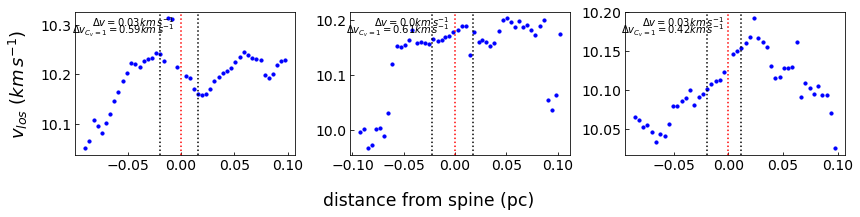

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,3))

plot_ortho_cut(param=vel_ext, extra_pix=20, fila=1, ax=ax, new_ax=False, marker_size=10, plot_cut_bound=True, 
               plot_cut_cent=True, print_delv=True, x_axis_phys=True, plot_sel_cuts=True, sel_cuts=[6, 9, 14])

ax[0].set_ylabel(r'$v_{los}\ (km\,s^{-1})$', labelpad=10)

fig.supxlabel('distance from spine (pc)', size='xx-large')

plt.tight_layout()


fig.savefig('plots/vel_grad_w_cv_fila_1_sample.pdf')

/var/folders/sk/jfjx4bmj537bjltqh3y2ldph0000gn/T/ipykernel_91483/3435525933.py:22: RuntimeWarning: invalid value encountered in divide
  sign = del_y/abs(del_y)
/var/folders/sk/jfjx4bmj537bjltqh3y2ldph0000gn/T/ipykernel_91483/3435525933.py:20: RuntimeWarning: invalid value encountered in divide
  sign = del_x/abs(del_x)


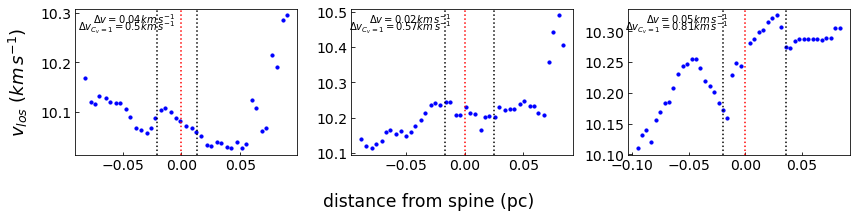

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,3))

plot_ortho_cut(param=vel_ext, extra_pix=16, fila=2, ax=ax, new_ax=False, marker_size=10, plot_cut_bound=True, 
               plot_cut_cent=True, print_delv=True, x_axis_phys=True, plot_sel_cuts=True, sel_cuts=[5,10,14])

ax[0].set_ylabel(r'$v_{los}\ (km\,s^{-1})$', labelpad=10)

fig.supxlabel('distance from spine (pc)', size='xx-large')

plt.tight_layout()

fig.savefig('plots/vel_grad_w_cv_fila_2_sample.pdf')

### Plot distribution of $\rm{C_v}$

In [93]:
evel_ext = fits.getdata('sorted_comps/evel_extended.fits')

##### Make list of the $\rm{C_v}$ values

In [94]:
fila=1

cv_list_fil1 = []
ecv_list_fil1 = []

for i in range(len(cent_spn_both[fila-1])):
    end_x1, end_y1 = x1_spn_both[fila-1][i], y1_spn_both[fila-1][i]
    end_x2, end_y2 = x2_spn_both[fila-1][i], y2_spn_both[fila-1][i]
    
    
    
    vel1 = vel_ext[int(np.round(end_y1)), int(np.round(end_x1))]
    vel2 = vel_ext[int(np.round(end_y2)), int(np.round(end_x2))]
    
    del_v = np.abs(vel1 - vel2)
    
    evel1 = evel_ext[int(np.round(end_y1)), int(np.round(end_x1))]
    evel2 = evel_ext[int(np.round(end_y2)), int(np.round(end_x2))]
    
    edel_v = evel1 + evel2
    
    cv = calc_cv_chen(del_v=del_v, ML=ML_both[fila-1][i])
    ecv = calc_cv_chen(del_v=del_v, ML=ML_both[fila-1][i], ret_err=True, edel_v=edel_v)
#     
#     print(edel_v)
    
    cv_list_fil1.append(cv)
    ecv_list_fil1.append(ecv)
    
#     print(end_x1)

In [95]:
fila=2

cv_list_fil2 = []
ecv_list_fil2 = []

for i in range(len(cent_spn_both[fila-1])):
    end_x1, end_y1 = x1_spn_both[fila-1][i], y1_spn_both[fila-1][i]
    end_x2, end_y2 = x2_spn_both[fila-1][i], y2_spn_both[fila-1][i]
    
    
    
    vel1 = vel_ext[int(np.round(end_y1)), int(np.round(end_x1))]
    vel2 = vel_ext[int(np.round(end_y2)), int(np.round(end_x2))]
    
    del_v = np.abs(vel1 - vel2)
    
    evel1 = evel_ext[int(np.round(end_y1)), int(np.round(end_x1))]
    evel2 = evel_ext[int(np.round(end_y2)), int(np.round(end_x2))]
    
    edel_v = evel1 + evel2
    
    cv = calc_cv_chen(del_v=del_v, ML=ML_both[fila-1][i])
    ecv = calc_cv_chen(del_v=del_v, ML=ML_both[fila-1][i], ret_err=True, edel_v=edel_v)
    
#     print(edel_v)
    
    cv_list_fil2.append(cv)
    ecv_list_fil2.append(ecv)
    
#     print(end_x1)

#### KDE

In [96]:
from scipy.stats import gaussian_kde

In [97]:
cv_list_combi = cv_list_fil1 + cv_list_fil2
ecv_list_combi = ecv_list_fil1 + ecv_list_fil2

In [98]:
cv_min = -0.001
cv_max = 0.055

x_grid = np.linspace(cv_min,cv_max, 100)

In [99]:
kde_w_weight = gaussian_kde(cv_list_combi, weights=np.asarray(ecv_list_combi))
kde_wo_weight = gaussian_kde(cv_list_combi)

pdf_w_weight = kde_w_weight.evaluate(x_grid)
pdf_wo_weight = kde_wo_weight.evaluate(x_grid)

eh = kde_w_weight(x_grid)

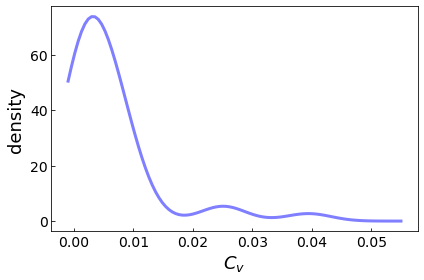

In [101]:
plt.plot(x_grid, pdf_wo_weight, color='blue', alpha=0.5, lw=3)

plt.xlabel(r'$C_v$')
plt.ylabel('density', labelpad=5)

plt.xticks(np.arange(0, cv_max, 0.01))

plt.tight_layout()

# plt.savefig('plots/kde_cv_both_fila.pdf')

### incorporate errors in $\rm C_v$